In [1]:
import warnings

import moscot as mt
from moscot import datasets
from moscot.problems.space import AlignmentProblem

import scanpy as sc
import squidpy as sq

warnings.simplefilter("ignore", UserWarning)

import pandas as pd

In [14]:
datasets = ['HCC-5A', 'HCC-5B', 'HCC-5C', 'HCC-5D']

input_dir = 'G:/dataset/LICA/input/'
output_dir = 'G:/dataset/LICA/output/moscot/'
expriment_name = 'LICA'

In [3]:
adata_list = []

for dataset in datasets:
    adata = sc.read_visium(input_dir + dataset)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata_label = pd.read_csv(input_dir + dataset + '/' + 'truth.csv', index_col=0)
    adata.obs['batch'] = adata_label['batch']
    adata.obs['ground.truth'] = adata_label['celltype']
    adata_list.append(adata)

print(adata_list)
adata =sc.AnnData.concatenate(adata_list[0],adata_list[1],adata_list[2],adata_list[3])
print(adata)
del adata_list

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical

[AnnData object with n_obs × n_vars = 3460 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 3958 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 3777 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 4352 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial']


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\merge.py:1015: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  concat_indices = concat_indices.str.cat(label_col.map(str), sep=index_unique)
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
D:\anaconda\envs\moscot\lib\site-pac

AnnData object with n_obs × n_vars = 15547 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


In [4]:
# adata = datasets.sim_align()
# adata

D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

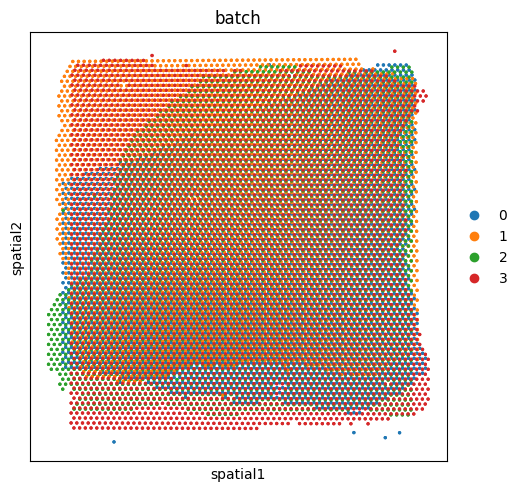

In [5]:
sq.pl.spatial_scatter(adata, shape=None, library_id="batch", color="batch")

In [6]:
%%time

ap = AlignmentProblem(adata=adata)
ap = ap.prepare(batch_key="batch", policy="sequential")

ap = ap.solve()

INFO     Ordering Index(['AAACAAGTATCTCCCA-1-0', 'AAACACCAATAACTGC-1-0', 'AAACAGAGCGACTCCT-1-0',                   
                'AAACAGCTTTCAGAAG-1-0', 'AAACAGGGTCTATATT-1-0', 'AAACATTTCCCGGATT-1-0',                            
                'AAACCACTACACAGAT-1-0', 'AAACCCGAACGAAATC-1-0', 'AAACCGGAAATGTTAA-1-0',                            
                'AAACCGGGTAGGTACC-1-0',                                                                            
                ...                                                                                                
                'TTGTTAGCAAATTCGA-1-3', 'TTGTTCAGTGTGCTAC-1-3', 'TTGTTCTAGATACGCT-1-3',                            
                'TTGTTGGCAATGACTG-1-3', 'TTGTTGTGTGTCAAGA-1-3', 'TTGTTTCACATCCAGG-1-3',                            
                'TTGTTTCATTAGTCTA-1-3', 'TTGTTTCCATACAACT-1-3', 'TTGTTTGTATTACACG-1-3',                            
                'TTGTTTGTGTAAATTC-1-3'],                                

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Solving `3` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(3460, 3958)].                                          


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


INFO     Solving problem OTProblem[stage='prepared', shape=(3958, 3777)].                                          


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Solving problem OTProblem[stage='prepared', shape=(3777, 4352)].                                          
CPU times: total: 45min 55s
Wall time: 13min 44s


AnnData object with n_obs × n_vars = 15547 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'batch_colors'
    obsm: 'spatial', 'spatial_warp_sequential'


D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

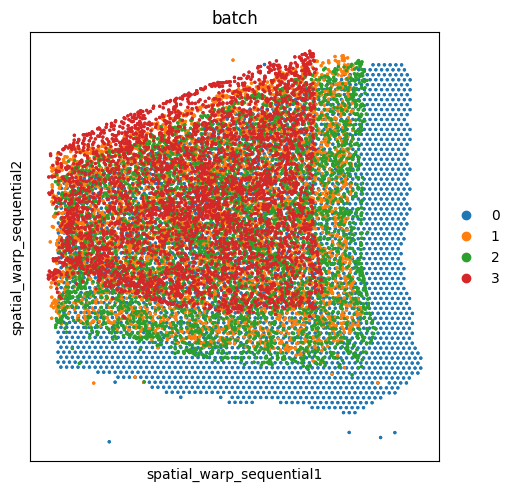

In [7]:
ap.align(reference="0", mode="warp", spatial_key="spatial", key_added="spatial_warp_sequential")
print(adata)

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_warp_sequential", library_id="batch", color="batch"
)

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is depre

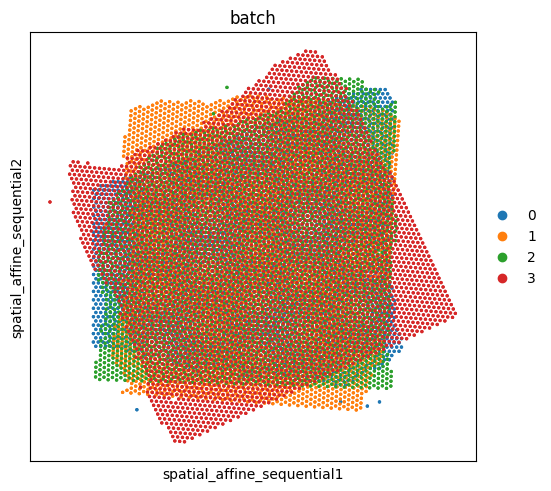

In [8]:
ap.align(reference="0", mode="affine", spatial_key="spatial", key_added="spatial_affine_sequential")

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_affine_sequential", library_id="batch", color="batch"
)

In [9]:
# %%time

# ap_star = AlignmentProblem(adata=adata)
# ap_star = ap_star.prepare(batch_key="batch", policy="star", reference="0")

# ap_star = ap_star.solve()

In [10]:
# ap_star.align(reference="0", mode="warp", spatial_key="spatial", key_added="spatial_warp_star")
# print(adata)

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_warp_star", library_id="batch", color="batch"
# )

In [11]:
# ap_star.align(reference="0", mode="affine", spatial_key="spatial", key_added="spatial_affine_star")

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_affine_star", library_id="batch", color="batch"
# )

In [12]:
adata

AnnData object with n_obs × n_vars = 15547 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'batch_colors', 'spatial_affine_sequential'
    obsm: 'spatial', 'spatial_warp_sequential', 'spatial_affine_sequential'

In [ ]:
adata

In [17]:
print(adata.isbacked)
adata.filename = output_dir + 'moscot_' + expriment_name + '.h5ad'
print(adata.isbacked)

False
True
